In [3]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split


# Load the Fashion MNIST dataset from CSV file
df = pd.read_csv(r'C:\Users\Deepti Wandhekar\Downloads\fashion_mnist_dataset.csv')

# Extract features (X) and labels (y) from the dataset.X = df.drop(['class_names', 'label'], axis=1).values: This line extracts the feature data from a DataFrame called df. The drop() function is used to remove the columns named 'class_names' and 'label' from the DataFrame along the specified axis (axis=1 refers to the column axis). The values attribute is then used to convert the resulting DataFrame into a NumPy array, representing the feature data. The resulting array is assigned to the variable X.
#y = df['label'].values: This line extracts the target variable data from the DataFrame df. It selects the column named 'label' from the DataFrame and converts it into a NumPy array using the values attribute. The resulting array is assigned to the variable y.

X = df.drop(['class_names', 'label'], axis=1).values
y = df['label'].values

# Normalize pixel values to range [0, 1]In the code snippet you provided, the feature data X is being normalized by dividing it by 255.0. This normalization step is typically performed on pixel values of image data to scale them to a range of [0, 1].
#By dividing each pixel value by 255.0, you are rescaling the pixel values from the original range of [0, 255] to the normalized range of [0, 1]. This normalization is done to ensure that all pixel values fall within the same scale and to improve the convergence and performance of machine learning models

X = X / 255.0

# Reshape the data to add the channel dimension.By using the np.reshape() function with the argument (-1, 28, 28, 1), the shape of X is modified to (num_samples, 28, 28, 1), where 1 represents the number of channels (in this case, grayscale). The -1 in the shape argument indicates that the size of that dimension should be automatically determined based on the other dimensions and the total number of elements.
X = np.reshape(X, (-1, 28, 28, 1))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the labels corresponding to the fashion categories
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

Dataset samples:
Image: 1
Label: 5
Class Name: Sandal
Image Data:


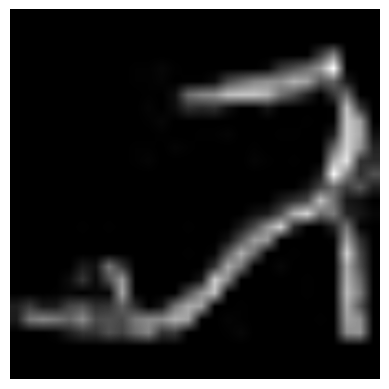


Image: 2
Label: 7
Class Name: Sneaker
Image Data:


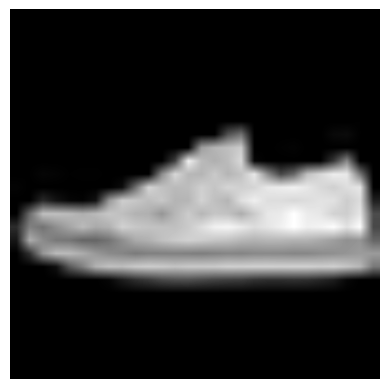


Image: 3
Label: 8
Class Name: Bag
Image Data:


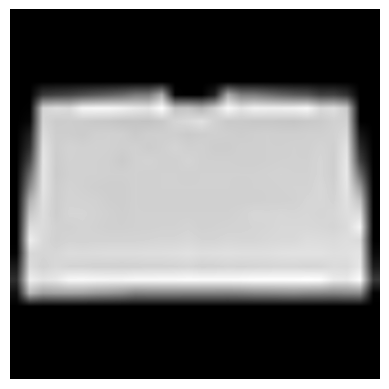

In [4]:
# Display few dataset samples
print("Dataset samples:")
for i in range(3):
    print("Image:", i+1)
    print("Label:", y_train[i])
    print("Class Name:", class_names[y_train[i]])
    print("Image Data:")
    resized_image = cv2.resize(X_train[i], (800, 800))
    plt.imshow(resized_image, cmap='gray')
    plt.axis('off')
    plt.show()
    print()

In [5]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=12, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

# Make predictions
predictions = model.predict(X_test)


Epoch 1/12
1500/1500 [==============================] - 31s 20ms/step - loss: 0.4930 - accuracy: 0.8216 - val_loss: 0.3590 - val_accuracy: 0.8694
Epoch 2/12
1500/1500 [==============================] - 27s 18ms/step - loss: 0.3315 - accuracy: 0.8795 - val_loss: 0.3098 - val_accuracy: 0.8878
Epoch 3/12
1500/1500 [==============================] - 28s 19ms/step - loss: 0.2821 - accuracy: 0.8978 - val_loss: 0.2721 - val_accuracy: 0.8981
Epoch 4/12
1500/1500 [==============================] - 29s 20ms/step - loss: 0.2473 - accuracy: 0.9090 - val_loss: 0.2707 - val_accuracy: 0.9028
Epoch 5/12
1500/1500 [==============================] - 28s 19ms/step - loss: 0.2241 - accuracy: 0.9192 - val_loss: 0.2603 - val_accuracy: 0.9018
Epoch 6/12
1500/1500 [==============================] - 29s 19ms/step - loss: 0.2004 - accuracy: 0.9270 - val_loss: 0.2713 - val_accuracy: 0.9031
Epoch 7/12
1500/1500 [==============================] - 31s 21ms/step - loss: 0.1817 - accuracy: 0.9329 - val_loss: 0.2624 -

Sample predictions:
Predicted label: Bag
Actual label: Bag

Image Data:


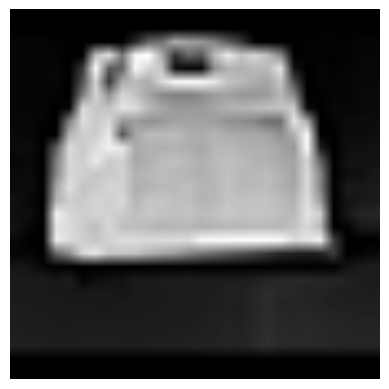


Predicted label: T-shirt/top
Actual label: T-shirt/top

Image Data:


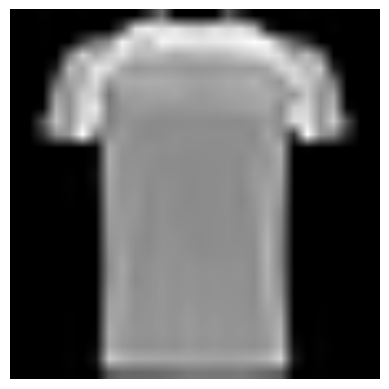


Predicted label: Pullover
Actual label: Pullover

Image Data:


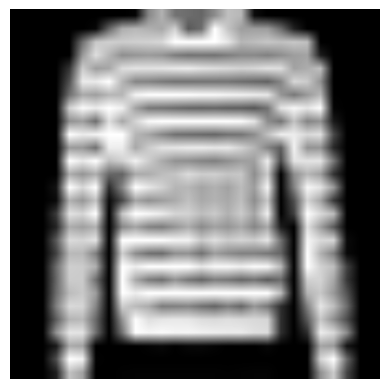


Predicted label: Sneaker
Actual label: Sneaker

Image Data:


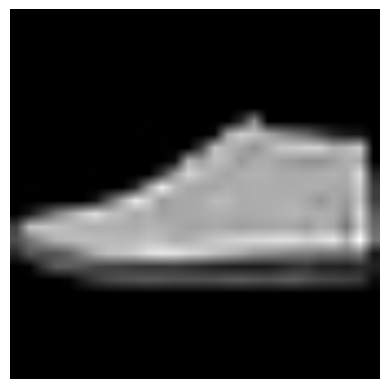


Predicted label: Dress
Actual label: Dress

Image Data:


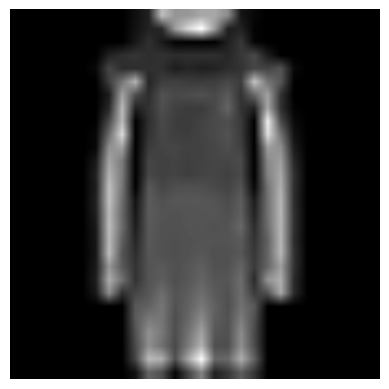

In [6]:
# Display sample predictions
import cv2
import matplotlib.pyplot as plt
print("Sample predictions:")
for i in range(100,105):
    predicted_label = np.argmax(predictions[i])
    actual_label = y_test[i]
    print("Predicted label:", class_names[predicted_label])
    print("Actual label:", class_names[actual_label])
    print()
    print("Image Data:")
    resized_image = cv2.resize(X_test[i], (750, 750))
    plt.imshow(resized_image, cmap='gray')
    plt.axis('off')
    plt.show()
    print()

In [ ]:
##
Dataset:
The MNIST Fashion dataset is a collection of 70,000 grayscale images of 28x28 pixels, representing 10
different categories of clothing and accessories. The categories include T-shirts/tops, trousers, pullovers,
dresses, coats, sandals, shirts, sneakers, bags, and ankle boots.

##CNN

CNN (Convolutional Neural Network) is a deep learning algorithm commonly used for analyzing visual data, such as images and videos.
It is made up of multiple layers, including convolutional layers, pooling layers, and fully connected layers.
The convolutional layers are the key component of a CNN, where filters are applied to the input image to extract features such as edges, textures, and shapes. 
The output of the convolutional layers is then passed through pooling layers, which are used to down-sample the feature maps, reducing the spatial dimensions while retaining the most important information. The output of the pooling layers is then passed through one or more fully connected layers, which are used to make a prediction or classify the image.


##Applications:
Image Classification 
Object Detection 
Semantic Segmentation
Face Recognition
Video Analysis

##build model
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))): This adds a 2D convolutional layer to the model with 32 filters of size 3x3. The activation function used is ReLU (Rectified Linear Unit). The input_shape parameter defines the shape of the input images, which is (28, 28, 1) for grayscale images.
model.add(MaxPooling2D((2, 2))): This adds a max pooling layer to the model with a pool size of 2x2. Max pooling reduces the spatial dimensions of the previous layer's output, capturing the most important features.
model.add(Conv2D(64, (3, 3), activation='relu')): This adds another 2D convolutional layer with 64 filters of size 3x3 and ReLU activation.
model.add(MaxPooling2D((2, 2))): This adds another max pooling layer with a pool size of 2x2.
model.add(Flatten()): This flattens the output from the previous layer into a 1-dimensional vector, preparing it for the fully connected layers.
model.add(Dense(64, activation='relu')): This adds a fully connected layer with 64 units and ReLU activation.
model.add(Dense(10, activation='softmax')): This adds the final fully connected layer with 10 units, corresponding to the number of classes in the classification task. The activation function used is softmax, which computes the probability distribution over the classes.

#optimizer='adam': This specifies the optimizer to be used during the training process. In this case, the Adam optimizer is chosen. Adam is an optimization algorithm that combines the benefits of both the AdaGrad and RMSProp algorithms, providing adaptive learning rates and efficient optimization.
loss='sparse_categorical_crossentropy': This specifies the loss function to be used for the training. The sparse categorical cross-entropy loss is suitable for multi-class classification tasks where the target variable is represented as integers (class labels) rather than one-hot encoded vectors. It calculates the cross-entropy loss between the predicted class probabilities and the true class labels
    
##
epochs=12: The number of epochs or complete passes through the entire training dataset.
batch_size=32: The number of samples per gradient update. The training data will be divided into batches of size 32, and the model parameters will be updated after each batch.
validation_data=(X_test, y_test): The validation data to be used during training. This is optional and allows you to monitor the model's performance on a separate validation dataset.
By calling model.fit(), the model will be trained using the specified configuration    
    
    
    

import numpy as np: This imports the NumPy library, which provides support for arrays and mathematical operations in Python.

import tensorflow as tf: This imports the TensorFlow library, which is a popular deep learning framework.

import pandas as pd: This imports the pandas library, which provides data manipulation and analysis tools.

import matplotlib.pyplot as plt: This imports the matplotlib library, which is used for data visualization.

import cv2: This imports the OpenCV library, which is commonly used for image processing tasks.

from tensorflow import keras: This imports the Keras module from TensorFlow, which is a high-level deep learning API.

from tensorflow.keras.models import Sequential: This imports the Sequential class from the keras.models module, which is used to build sequential models in Keras.

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense: This imports specific layer classes from the keras.layers module, which are commonly used in convolutional neural networks (CNNs) for image processing tasks.

from sklearn.model_selection import train_test_split: This imports the train_test_split function from the sklearn.model_selection module, which is used to split data into training and testing sets